### 12/9/2024 - Simple math behind blurring images

Source: [Medium](https://medium.com/puzzle-sphere/math-behind-image-blur-instagram-snapchat-gaussian-function-quantum-mechanics-convolution-kernel-average-45757b744e83)

#### Guassian Blur: From Quantum mechanics to Image processing

- Guassian Blur is a Probability distribution function.
- Averaging the pixel values of the image.

How does the software decide which pixels to blend together and in what way and by how much?
It is called: Convolution


Convolution: The core of the blur effect
- each pixel information (pixel value) is first gathered from its neighbouring pixels and then, that pixel is modified according to some formula that incorporates that neighbouring information.

Ex: consider a matrix as image, take a 9*9 matrix and divide each pixel value by the average of all the value.
That's it now its blurred image.

[Test the above method]




Original 12x12 Matrix:
 50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0
 50.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0  50.0
 50.0 200.0 255.0 255.0 255.0 255.0 255.0 255.0 255.0 255.0 200.0  50.0
 50.0 200.0 255.0 255.0  30.0 255.0 255.0 255.0  30.0 255.0 200.0  50.0
 50.0 200.0 255.0 255.0 255.0 255.0 255.0 255.0 255.0 255.0 200.0  50.0
 50.0 200.0 255.0  30.0 255.0 255.0  30.0 255.0 255.0 255.0 200.0  50.0
 50.0 200.0 255.0 255.0 255.0 255.0 255.0 255.0 255.0 255.0 200.0  50.0
 50.0 200.0 255.0 255.0 255.0  30.0 255.0 255.0 255.0 255.0 200.0  50.0
 50.0 200.0 255.0 255.0 255.0 255.0 255.0 255.0 255.0 255.0 200.0  50.0
 50.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0  50.0
 50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0
 50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0

Blurred 12x12 Matrix:
 50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0
 50.0  87.5 125.0 

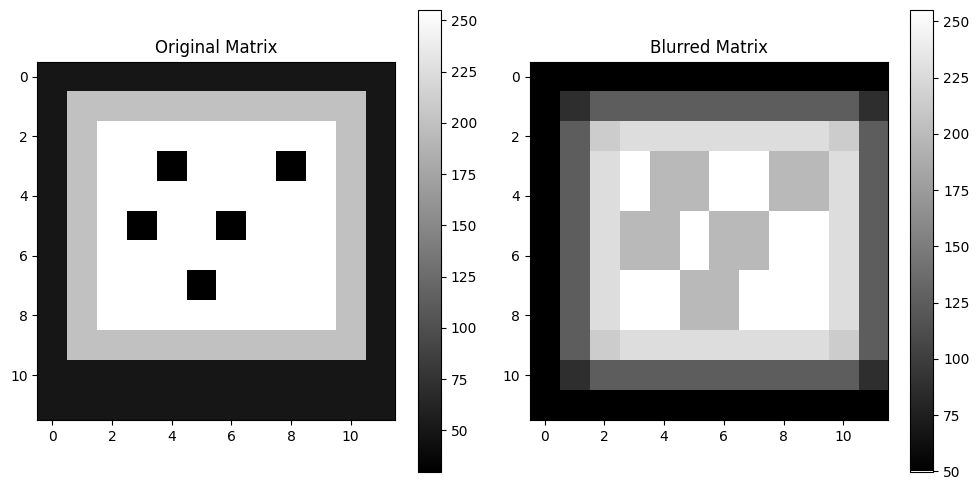

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def print_matrix(matrix, title):
    """Utility function to print a matrix with a title."""
    print(title)
    for row in matrix:
        print(" ".join(f"{val:5.1f}" for val in row))
    print()

def blur_matrix(matrix):
    """Apply blur effect by averaging neighboring pixel values."""
    rows, cols = matrix.shape
    blurred = np.zeros_like(matrix, dtype=float)

    for i in range(rows):
        for j in range(cols):
            # Collect neighbors including the pixel itself
            neighbors = [
                matrix[x, y]
                for x in range(max(0, i - 1), min(rows, i + 1))
                for y in range(max(0, j - 1), min(cols, j + 1))
            ]
            blurred[i, j] = sum(neighbors) / len(neighbors)

    return blurred

# Define a 12x12 matrix with random pixel values (0 to 255)
# np.random.seed(42)  # For reproducibility
# matrix = np.random.randint(0, 256, (12, 12))

array = [
 [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50],  # Rind (outer edge)
 [50, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 50],  # White rind
 [50, 200, 255, 255, 255, 255, 255, 255, 255, 255, 200, 50],  # Flesh
 [50, 200, 255, 255, 30, 255, 255, 255, 30, 255, 200, 50],  # Seeds
 [50, 200, 255, 255, 255, 255, 255, 255, 255, 255, 200, 50],  # Flesh
 [50, 200, 255, 30, 255, 255, 30, 255, 255, 255, 200, 50],  # Seeds
 [50, 200, 255, 255, 255, 255, 255, 255, 255, 255, 200, 50],  # Flesh
 [50, 200, 255, 255, 255, 30, 255, 255, 255, 255, 200, 50],  # Seeds
 [50, 200, 255, 255, 255, 255, 255, 255, 255, 255, 200, 50],  # Flesh
 [50, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 50],  # White rind
 [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50],  # Rind (outer edge)
 [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]   # Rind (outer edge)
]

# Convert to NumPy array for visualization
matrix = np.array(array)


# Print the original matrix
print_matrix(matrix, "Original 12x12 Matrix:")

# Apply the blur effect
blurred_matrix = blur_matrix(matrix)

# Print the blurred matrix
print_matrix(blurred_matrix, "Blurred 12x12 Matrix:")

# Display the matrices as images
plt.figure(figsize=(10, 5))

# Original matrix
plt.subplot(1, 2, 1)
plt.title("Original Matrix")
plt.imshow(matrix, interpolation="none", cmap='grey')
plt.colorbar()

# Blurred matrix
plt.subplot(1, 2, 2)
plt.title("Blurred Matrix")
plt.imshow(blurred_matrix, interpolation="none", cmap='grey')
plt.colorbar()

plt.tight_layout()
plt.show()

*Kernel (or filter):* is the filter aka small matrix of size 3*3
- The larger the kernel, the more neighbours are considered and the blurrier the result.
*Pixel Averaging:* each pixel in the image was replaced by the weighted sum of its neighbouring pixels

<br>
The Gaussian Blur: A special kind of smoothing <br>
Instead of just averaging the neighbouring pixels equally, the gaussian blur weights the pixels based on their distance from the center of the kernel <br>
Giving more importance to nearby pixels and less to the far ones.

<br>

Gσ = (1/ 2πσ²) e ^ (x²+y²/ 2σ²) 
<br>
- X and Y are the distances from the center pixel.
- σ controls the width of the bell curve. it controls how much blur is applied. Larger it is stronger blur.
<br>

*What is its advantage over equal averaging?*
Gaussian blur provides a more natural looking blur and mimics how we actually perceive soft focus in real life.
It smoothens the transition between sharp and blurred regions more accurately.

#### Other Applications
* In photography, blurring helps draw focus to subjects by reducing distractions in the background.
* In computer vision, blur is used to smoothen the noise and prepare our images for further analysis like running an edge detection algorithm.
* In video games and CGI, gaussian blur is used to create depth-of-field effect which makes everything look more real. (Motion blur).
* Cryptopgraphy and data privacy. Technique like differential privacy use mathematical noise (a form of blur) to obscure data and protect the privacy of users.

***


### 1/1/2025 - Why is it better to report standard deviation than Variance

Source: [Medium](https://tracyrenee61.medium.com/statistics-interview-question-why-is-it-better-to-report-standard-deviation-than-variance-c2c2259d5f24)

##### Standard deviation is expressed in the same units of data.
If your data is price in dollars, your stdev is in dollars. If you use variance, it's in dollars squared. What the heck is a square dollar? It has no physical meaning, unlike square meters for example.

Ease of Communication:

Since the standard deviation reflects the average spread of the data around the mean in the same units, it is more intuitive for non-statistical audiences.
Variance requires an additional mental step to relate it back to the original data.

Compatibility with Normal Distribution:

In a normal distribution, standard deviation has a straightforward interpretation (e.g., ~68% of data lies within ±1 SD, ~95% within ±2 SD).
Variance does not have this intuitive interpretability. 

In summary, while variance is a mathematically important concept (e.g., used in formulas and statistical models), standard deviation is more practical and interpretable for reporting and understanding data variability.

***

### 1/2/2025 - GPT - o1 usage

Source: [LinkedIn](https://www.linkedin.com/posts/eric-vyacheslav-156273169_you-are-using-o1-wrong-lets-establish-some-activity-7271524034733842432-t4Mf/?utm_source=share&utm_medium=member_android)

o1-preview is a general purpose model.
o1-mini specializes in Science, Technology, Engineering, Math

How are they different from 4o?
4o
When you ask it to create the app, it cannot break down the problem into small pieces, make sure the individual parts work and weave everything together. If you know how pre-trained transformers work, you will get my point.

Why o1?
After GPT-4 was released someone clever came up with a new way to get GPT-4 to think step by step in the hopes that it would mimic how humans think about the problem. This was called Chain-Of-Thought where you break down the problems and then solve it. The results were promising

***




### 1/3/2025 - PyMuPDF4LLM for Extracting data from PDFs

Source: [Medium](https://medium.com/@shravankoninti/pymupdf4llm-is-all-you-need-for-extracting-data-from-pdfs-8cfad33bdfaf#:~:text=This%20package%20converts%20the%20pages,to%20GitHub%2Dcompatible%20Markdown%20text.)

Versatile markdown extraction
flexibility in application
comprehensive extraction

In [ ]:
!pip install pymupdf4llm
!pip install llama_index

import pymupdf4llm as pdf
import pathlib

# Extract pdf content as markdown
# md_text = pdf.to_markdown('input.pdf')
# print(md_text[:50])
# Extract only pages 2 and 3
md_text = pdf.to_markdown('input.pdf', pages=[2,3])
print(md_text[:50])
# save
pathlib.Path('output.md').write_bytes(md_text.encode())
# Llama index
llama_reader = pdf.LlamaMarkdownReader()
llama_docs = llama_reader.load_data('input.pdf')
llama_docs[0].text
# Extracting images
md_text_images = pdf.to_markdown(
    doc = 'input.pdf',
    pages = [2,3],
    page_chunks=True,
    write_images = True,
    image_path = 'images',
    image_format = 'jpg',
    dpi = 200
)
print(md_text_images[1]['images'])
# meta data
md_text_chunks = pdf.to_markdown(doc = 'input.pdf', pages = [0, 1, 2], page_chunks=True)
print(md_text_chunks)
# word by word extraction
md_text_words = pdf.to_markdown(doc='input.pdf',
                                pages=[1,2, 3, 4],
                                page_chunks = True,
                                write_images = True,
                                image_path = 'images1', 
                                image_format='jpg',
                                dpi=200,
                                extract_words = True)
print(md_text_words[1]['words'][:5])

import json
# Extract tables
md_text_tables = pdf.to_markdown(doc = 'input.pdf', pages = [9])
print(md_text_tables)

***

### 1/4/2025 - AI Agents vs Agentic AI: What’s the Difference and Why Does It Matter?

Source: [Medium](https://medium.com/@elisowski/ai-agents-vs-agentic-ai-whats-the-difference-and-why-does-it-matter-03159ee8c2b4)

What is Agentic AI?

At its core, Agentic AI is a type of AI that’s all about autonomy. This means that it can make decisions, take actions, and even learn on its own to achieve specific goals. It’s kind of like having a virtual assistant that can think, reason, and adapt to changing circumstances without needing constant direction

- Perception: It gathers data from the world around it.
- Reasoning: It processes this data to understand what’s going on.
- Action: It decides what to do based on its understanding.
- Learning: It improves and adapts over time, learning from feedback and experience.

What is an AI Agent?

On the other hand, AI Agents are typically built to do specific tasks. They’re designed to help you with something — like answering questions, organizing your calendar, or even managing your email inbox. AI Agents are great at automating simple, repetitive tasks but don’t have the autonomy or decision-making abilities that Agentic AI does. Think of them as virtual helpers that do exactly what you tell them to do, without thinking for themselves.



|Agentic AI| AI Agent|
|-----|-----|
|Goal oriented|Task oriented|
|Continuous learn| may not learn or only learns from set of instructions and context|
|Handle complex| handle simple and structured|
|Actively adapts to surrowndings and changes| react to set inputs and doesn't adapt|

Agentic AI in Action
- self driving cars
- Supply Chain Management
- Cybersecurity
- Healthcare

AI Agents in Action
- Customer Support
- Personal Assistants
- Email Management
- Productivity Tools

---

### 1/5/2025 - Datascience skills

Source: [Medium](https://medium.com/towards-data-science/top-12-skills-data-scientists-need-to-succeed-in-2025-c80f54cf227a)

1. Communication skills
 - explain tech stuff
 - storytelling
 - communicate with stakeholders
 - communication in writing
 - avoiding pitfalls (think before you talk)
2. Programming (python)
 - dataclass
3. Deep understanding of data
 - validation , understanding, eda, understand the effects
4. software engineering best practices
- git, clean code, testing, oop, containerization
5. Interacting with databases
- relational databases, nosql, data pipeline, datalakes etc
6. cloud computing
7. master ml frameworks
 - huggingface, fastai
8. mlops
 - wandb, mlflow, clearml, neptune
9. understanding metrics
 - accuracy, f1, precision etc
10. problem solving and critical thinking
11. ai based tools and workflows
12. adaptability and continuous learning

***

### 1/6/2025 - ML Road map 2025

Source: [Markdown](https://pub.towardsai.net/how-id-learn-ml-in-2025-if-i-could-start-over-5e83cefdb2aa)

Python

Math
 - Derivatives and integral
 - vectors and matrices
 - probability theory (Bayes rule)
 - log rules, summation rules
 - Book Recomm: Why Machines Learn: The Elegant Math Behind Modern AI

Machine Learning
 - Andrew Ng's Machine learning specialization

Deep learning
 - Andrew Ng's Deep Learning specialization
 - standord's cs25 series
 - Andrej karpathy's youtube videos
 - https://udlbook.github.io/udlbook/ (Understanding Deep learning)

kaggle simple competition

Implement paper in coding

write paper in arxiv

